# Import Libraries

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

# Dataset Overview

In [442]:
df = pd.read_csv('loan_data_2007_2014.csv', index_col=0)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
# Here we take only the accounts that were charged-off (written-off).
df = df[df['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [444]:
print(f'This dataset consist of {df.shape[0]} rows and {df.shape[1]} columns')

This dataset consist of 43236 rows and 74 columns


In [445]:
# check null values 
df.isnull().sum()/len(df)*100

id                               0.000000
member_id                        0.000000
loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_title                        7.602461
emp_length                       5.405218
home_ownership                   0.000000
annual_inc                       0.000000
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
pymnt_plan                       0.000000
url                              0.000000
desc                            63.363863
purpose                          0.000000
title                            0.006939
zip_code                         0.000000
addr_state                       0

In [446]:
# filter features that has only missing values < 20%
df_null = (df.isnull().sum()/len(df)*100).reset_index().rename(columns={'index':'feature',0:'missing'})
df_null = df_null[df_null['missing']<=20]
df_null

,feature,missing
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
5,term,0.000000
6,int_rate,0.000000
7,installment,0.000000
8,grade,0.000000
9,sub_grade,0.000000


In [447]:
col

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq']

In [448]:
# filter and assign to df
col = df_null['feature'].to_list()
df = df[col]
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,Apr-04,2.0,11.0,0.0,5210,32.6,13.0,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.09,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,other,Building my credit history.,774xx,TX,18.08,0.0,Sep-04,0.0,2.0,0.0,9279,36.5,3.0,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.52,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0.0


In [449]:
df.shape

(43236, 49)

# Feature Engineering 

## Independent Features

### Date Time Features : `last_pymnt_d`

Assume we're now on 2016, 1 st June

In [450]:
# check value_counts
# df['last_pymnt_d'].value_counts()

In [451]:
# format data type
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')

# we will count the distance of last payment month until today (June 1st, 2016)
df['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - df['last_pymnt_d']) / np.timedelta64(1, 'M')))
df['last_pymnt_d'].describe()

count    42860.000000
mean        24.905740
std         14.939725
min          5.000000
25%         14.000000
50%         21.000000
75%         31.000000
max        102.000000
Name: last_pymnt_d, dtype: float64

### Date Time Features : `last_credit_pull_d`

In [452]:
# df['last_credit_pull_d'].value_counts()

In [453]:
# format data type
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

# we will count the distance of last payment month until today (June 1st, 2016)
df['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))
df['last_credit_pull_d'].describe()

count    43230.000000
mean        14.176914
std         13.011291
min          5.000000
25%          5.000000
50%          7.000000
75%         19.000000
max        105.000000
Name: last_credit_pull_d, dtype: float64

### Date Time Features : `earliest_cr_line`

In [454]:
# df['earliest_cr_line'].value_counts()

In [455]:
# drop missing values
df = df.dropna(subset=['earliest_cr_line'])
df['earliest_cr_line'].isnull().sum()

0

In [456]:
new = df['earliest_cr_line'].str.split('-', n=1, expand=True)
df['earliest_cr_line_month'] = new[0]
df['earliest_cr_line_year'] = new[1]

In [457]:
new_list = []

for word in df['earliest_cr_line_year']:
    if word == '00':
        new_list.append('20'+word)
    elif word == '01':
        new_list.append('20'+word)
    elif word == '02':
        new_list.append('20'+word)
    elif word == '03':
        new_list.append('20'+word)
    elif word == '04':
        new_list.append('20'+word)
    elif word == '05':
        new_list.append('20'+word)
    elif word == '06':
        new_list.append('20'+word)
    elif word == '07':
        new_list.append('20'+word)
    elif word == '08':
        new_list.append('20'+word)
    elif word == '09':
        new_list.append('20'+word)
    elif word == '10':
        new_list.append('20'+word)
    elif word == '11':
        new_list.append('20'+word)
    else:
        new_list.append('19'+word)
        
df['year_year'] = new_list
df['year_year'].head()

1     1999
8     2004
9     2004
12    2004
14    1991
Name: year_year, dtype: object

In [458]:
# assign to original features
df['earliest_cr_line'] = df['earliest_cr_line_month'] + ' ' + df['year_year']

In [459]:
# drop temporary features
df.drop(['earliest_cr_line_month', 'earliest_cr_line_year', 'year_year'], inplace=True, axis=1)

In [460]:
# format data type
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b %Y')

# we will count the distance of last payment month until today (June 1st, 2016)
df['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df['earliest_cr_line'].describe()

count    43233.000000
mean       216.210395
std         84.235689
min         57.000000
25%        160.000000
50%        201.000000
75%        256.000000
max        737.000000
Name: earliest_cr_line, dtype: float64

### Date Time Features : `term` to integer

In [461]:
df['term'].value_counts()

 36 months    28101
 60 months    15132
Name: term, dtype: int64

In [462]:
df['term'] = df['term'].apply(lambda term: int(term[:3])) # filter for first 2 character
df['term'].value_counts()

36    28101
60    15132
Name: term, dtype: int64

## Dependent Features

### `Recovery Rate` 

In [463]:
# we assume funded_amnt reflect the total amount that was lost the moment was borrowers defaulted
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

df['recovery_rate'] = df['recoveries'] / df['funded_amnt']
df['recovery_rate'].describe()

count    43233.000000
mean         0.060791
std          0.089661
min          0.000000
25%          0.000000
50%          0.029453
75%          0.114043
max          1.220774
Name: recovery_rate, dtype: float64

In [464]:
# because it's a rate, we set the values lay between 0-1
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.
df['recovery_rate'] = np.where(df['recovery_rate'] > 1, 1, df['recovery_rate'])
df['recovery_rate'] = np.where(df['recovery_rate'] < 0, 0, df['recovery_rate'])

In [465]:
df['recovery_rate'].describe()

count    43233.000000
mean         0.060740
std          0.089092
min          0.000000
25%          0.000000
50%          0.029453
75%          0.114043
max          1.000000
Name: recovery_rate, dtype: float64

<AxesSubplot:xlabel='recovery_rate', ylabel='Count'>

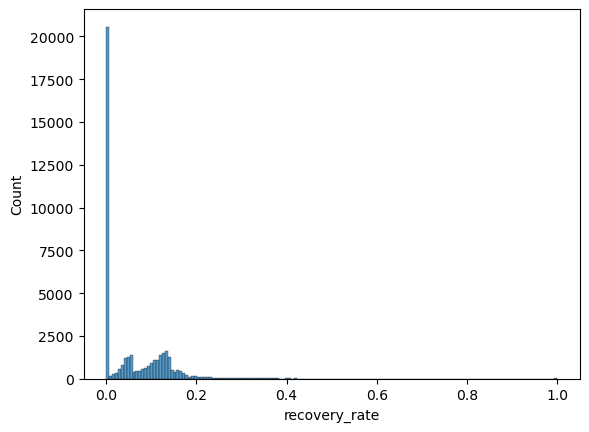

In [466]:
sns.histplot(df['recovery_rate'])

<AxesSubplot:xlabel='recovery_rate_0_1', ylabel='count'>

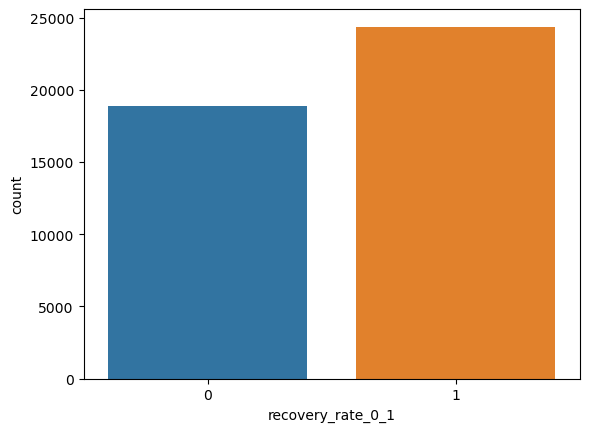

In [467]:
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.
df['recovery_rate_0_1'] = np.where(df['recovery_rate'] == 0, 0, 1)
sns.countplot(df['recovery_rate_0_1'])

### `Credit Conversion Factor` 

In [468]:
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.
df['CCF'] = (df['funded_amnt'] - df['total_rec_prncp']) / df['funded_amnt']
df['CCF'].describe()

count    43233.000000
mean         0.735963
std          0.200735
min          0.000438
25%          0.632088
50%          0.789943
75%          0.888544
max          1.000000
Name: CCF, dtype: float64

<AxesSubplot:xlabel='CCF', ylabel='Count'>

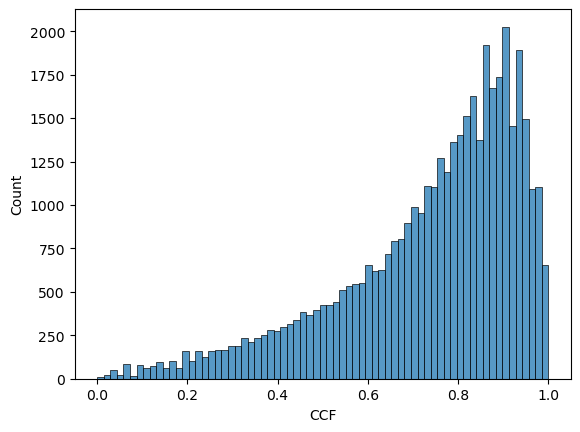

In [469]:
sns.histplot(df['CCF'])

# Data Cleaning

In [470]:
df_null = pd.DataFrame(df.isnull().sum()/len(df)*100).reset_index().rename(columns=({'index':'feature',0:'missing'}))
df_null = df_null[df_null['missing']>0]
df_null

,feature,missing
10,emp_title,7.602988
11,emp_length,5.405593
20,title,0.006939
30,revol_util,0.115652
42,last_pymnt_d,0.869706
44,last_credit_pull_d,0.013878
45,collections_12_mths_ex_med,0.057826


In [471]:
# fill missing values
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['last_pymnt_d'].median())
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].median())
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [472]:
# drop high cardinality features
drop_list = ['emp_title', 'emp_length', 'title']
df = df.drop(drop_list, axis=1)

# recheck missing values
df.isnull().any()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
purpose                       False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths                False
open_acc                      False
pub_rec                       False
revol_bal                     False
revol_util                  

# Feature Selection & Encoding

In [473]:
# save ID, sepeate from df
df_id = df[['id', 'member_id']]

# drop ID from df
df = df.drop(['id', 'member_id'], axis=1)

# filter categorical features
cat = df.select_dtypes(include='object').columns
df[cat].head()

,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,initial_list_status,application_type
1,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,309xx,GA,f,INDIVIDUAL
8,F,F2,OWN,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,small_business,958xx,CA,f,INDIVIDUAL
9,B,B5,RENT,Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,other,774xx,TX,f,INDIVIDUAL
12,C,C1,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,245xx,VA,f,INDIVIDUAL
14,B,B2,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,other,951xx,CA,f,INDIVIDUAL


we will drop these features:
- `issue_d` --> we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date,we'll drop this feature
- `url` --> high cardinality (unused)
- `sub_grade` --> the same information covered in general with `grade`
- `zip_code` --> unused
- `addr_state` --> high cardinality
- `application_type` --> constant features

In [474]:
# define drop list and drop
drop_list = ['issue_d', 'url', 'sub_grade', 'zip_code', 'addr_state', 'application_type']
df = df.drop(drop_list, axis=1)

# define updated cat
cat = ['grade', 'home_ownership', 'verification_status', 'purpose', 'loan_status', 'pymnt_plan', 'initial_list_status']
df[cat].head()

,grade,home_ownership,verification_status,purpose,loan_status,pymnt_plan,initial_list_status
1,C,RENT,Source Verified,car,Charged Off,n,f
8,F,OWN,Source Verified,small_business,Charged Off,n,f
9,B,RENT,Verified,other,Charged Off,n,f
12,C,RENT,Source Verified,debt_consolidation,Charged Off,n,f
14,B,RENT,Source Verified,other,Charged Off,n,f


In [475]:
# one hot encoding
dummies = pd.get_dummies(df[cat], drop_first=True)

# concat
df = pd.concat([df, dummies], axis=1)

# drop original cat features
df = df.drop(cat, axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,recovery_rate,recovery_rate_0_1,CCF,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_status_Does not meet the credit policy. Status:Charged Off,initial_list_status_w
1,2500,2500,2500.0,60,15.27,59.83,30000.0,1.00,0.0,206.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,38.0,119.66,33.0,0.0,1,0.0,0.046832,1,0.817416,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5600,5600,5600.0,60,21.28,152.39,40000.0,5.55,0.0,146.0,2.0,11.0,0.0,5210,32.6,13.0,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,50.0,152.39,46.0,0.0,1,0.0,0.033761,1,0.971068,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,5375,5375,5350.0,60,12.69,121.45,15000.0,18.08,0.0,141.0,0.0,2.0,0.0,9279,36.5,3.0,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,43.0,121.45,39.0,0.0,1,0.0,0.050100,1,0.874701,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,9000,9000,9000.0,36,13.49,305.38,30000.0,10.08,0.0,146.0,1.0,4.0,0.0,10452,91.7,9.0,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,47.0,305.38,43.0,0.0,1,0.0,0.049367,1,0.860429,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14,10000,10000,10000.0,36,10.65,325.74,100000.0,7.06,0.0,301.0,2.0,14.0,0.0,11997,55.5,29.0,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,32.0,325.74,27.0,0.0,1,0.0,0.064510,1,0.456653,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [476]:
# rename columns
df = df.rename(columns=({'verification_status_Source Verified':'verification_status_verif', 
                        'loan_status_Does not meet the credit policy. Status:Charged Off':'charge_off'}))

In [483]:
df.shape

(43233, 61)

In [484]:
df_columns = df.columns
data = df.copy()

# LGD Model

## Split Dataset

In [331]:
from sklearn.model_selection import train_test_split

# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
x_train, x_test, y_train, y_test = train_test_split(df.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), 
                                                    df['recovery_rate_0_1'], 
                                                    test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape

((34586, 58), (8647, 58))

In [328]:
lgd_col = x_train.columns

## Find Pvalues

In [243]:
import statsmodels.api as sm

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()


# Converting statsmodels summary object to Pandas Dataframe,
df_ols = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0]
df_ols = df_ols[['coef', 'P>|t|']]
df_ols

,coef,P>|t|
loan_amnt,1.772000e-06,0.543
funded_amnt,-2.163000e-05,0.000
funded_amnt_inv,8.661000e-06,0.000
term,1.300000e-03,0.003
int_rate,1.370000e-02,0.000
installment,-9.152000e-05,0.096
annual_inc,1.759000e-07,0.002
dti,-6.000000e-04,0.020
delinq_2yrs,2.300000e-03,0.360
earliest_cr_line,-1.000000e-04,0.000


## Training Model Stage 1 Logistic Regression

`The goal of this model is to predict whether the recovery rate is 0 or not`

In [332]:
# train model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix


lr = LogisticRegression() 
lr.fit(x_train, y_train)

# let's get the predictions
y_pred_proba_train = lr.predict_proba(x_train)[:][:,1]
y_pred_proba_test = lr.predict_proba(x_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_pred_proba_train))
print('AUC Test Proba :', roc_auc_score(y_test, y_pred_proba_test))

AUC Train Proba : 0.9925149173475
AUC Test Proba : 0.9937712613164522


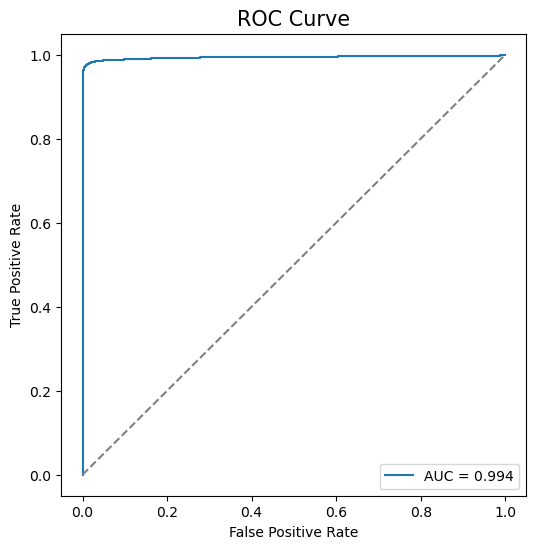

In [333]:
fpr, tpr, tr = roc_curve(y_test, y_pred_proba_test)
auc = roc_auc_score(y_test, y_pred_proba_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

In [334]:
# classification report
y_pred_class = []

for i in y_pred_proba_test:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3750
           1       1.00      0.96      0.98      4897

    accuracy                           0.98      8647
   macro avg       0.97      0.98      0.98      8647
weighted avg       0.98      0.98      0.98      8647



## Training Model Stage 2 Linear Regression

`The goal of this model is to predict the values of recovery rate`

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

In [335]:
multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(x_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [337]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X_test, y_test, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y_test, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  0.5299190677099965
Testing Accuracy for Multiple Linear Regression Model:  0.5432927601803541
RMSE for Training Data:  0.34008242183397036
RMSE for Testing Data:  0.33491467307000616
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.5327395317298753


## Combining Stage 1 and Stage 2

In [338]:
len(y_pred_class), len(y_pred_MLR_test)

(8647, 8647)

In [339]:
# Here we combine the predictions of the models from the two stages.
y_test_lgd = y_pred_class * y_pred_MLR_test
y_test_lgd

array([0.        , 0.        , 0.        , ..., 0.75841945, 0.        ,
       0.        ])

In [340]:
pd.DataFrame(y_test_lgd).describe(percentiles=[0.8,0.85,0.9,0.95])

,0
count,8647.000000
mean,0.446054
std,0.459154
min,-0.061253
50%,0.499005
80%,0.871846
85%,0.925101
90%,0.991609
95%,1.124553
max,4.781769


In [341]:
# as a 'RATE', we should lay the values between 0-1
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.
y_test_lgd = np.where(y_test_lgd < 0, 0, y_test_lgd)
y_test_lgd = np.where(y_test_lgd > 1, 1, y_test_lgd)

In [342]:
pd.DataFrame(y_test_lgd).describe()

,0
count,8647.000000
mean,0.423706
std,0.411888
min,0.000000
25%,0.000000
50%,0.499005
75%,0.825572
max,1.000000


# EAD Model

## Split Dataset

In [343]:
from sklearn.model_selection import train_test_split

# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
x_train, x_test, y_train, y_test = train_test_split(df.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), 
                                                    df['CCF'], 
                                                    test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape

((34586, 58), (8647, 58))

In [321]:
ead_col = x_train.columns

## Model Training Linear Regression

In [348]:
multiple_linear_reg2 = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg2.fit(x_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [349]:
# Prediction with training dataset:
y_pred_MLR_train2 = multiple_linear_reg.predict(x_train)

# Prediction with testing dataset:
y_pred_MLR_test2 = multiple_linear_reg.predict(x_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train2)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test2)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train2))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test2))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR2 = cross_val_predict(multiple_linear_reg2, X_test, y_test, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y_test, y_pred_cv_MLR2)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -3.932155196771558
Testing Accuracy for Multiple Linear Regression Model:  -3.77783931283098
RMSE for Training Data:  0.4446986916494573
RMSE for Testing Data:  0.44300421372590976
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.6802923929395546


In [350]:
pd.DataFrame(y_pred_MLR_test).describe()

,0
count,8647.000000
mean,0.569148
std,0.359698
min,-0.332682
25%,0.280488
50%,0.538233
75%,0.830239
max,4.781769


In [351]:
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.
y_pred_MLR_test = np.where(y_pred_MLR_test < 0, 0, y_pred_MLR_test)
y_pred_MLR_test = np.where(y_pred_MLR_test > 1, 1, y_pred_MLR_test)

In [352]:
pd.DataFrame(y_pred_MLR_test).describe()

,0
count,8647.000000
mean,0.547169
std,0.303660
min,0.000000
25%,0.280488
50%,0.538233
75%,0.830239
max,1.000000


# Expected Loss

In [427]:
dataset = pd.read_csv('loan_data_2007_2014.csv', index_col=0)
dataset = dataset[col] # col = already filtered and eliminated high missing values
dataset.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0


In [369]:
df_clean.shape

(466285, 74)

## Feature Engineering

In [428]:
# Assume we're now on 2016, 1 st June
# format data type last_pymnt_d
dataset['last_pymnt_d'] = pd.to_datetime(dataset['last_pymnt_d'], format = '%b-%y')

# we will count the distance of last payment month until today (June 1st, 2016)
dataset['last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - dataset['last_pymnt_d']) / np.timedelta64(1, 'M')))

In [429]:
# format data type last_credit_pull_d
dataset['last_credit_pull_d'] = pd.to_datetime(dataset['last_credit_pull_d'], format = '%b-%y')

# we will count the distance of last payment month until today (June 1st, 2016)
dataset['last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - dataset['last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [430]:
# drop missing values earliest_cr_line
dataset = dataset.dropna(subset=['earliest_cr_line'])

new = dataset['earliest_cr_line'].str.split('-', n=1, expand=True)
dataset['earliest_cr_line_month'] = new[0]
dataset['earliest_cr_line_year'] = new[1]

In [431]:
# earliest_cr_line
new_list = []

for word in dataset['earliest_cr_line_year']:
    if word == '00':
        new_list.append('20'+word)
    elif word == '01':
        new_list.append('20'+word)
    elif word == '02':
        new_list.append('20'+word)
    elif word == '03':
        new_list.append('20'+word)
    elif word == '04':
        new_list.append('20'+word)
    elif word == '05':
        new_list.append('20'+word)
    elif word == '06':
        new_list.append('20'+word)
    elif word == '07':
        new_list.append('20'+word)
    elif word == '08':
        new_list.append('20'+word)
    elif word == '09':
        new_list.append('20'+word)
    elif word == '10':
        new_list.append('20'+word)
    elif word == '11':
        new_list.append('20'+word)
    else:
        new_list.append('19'+word)
        
dataset['year_year'] = new_list

In [432]:
# assign to original features
dataset['earliest_cr_line'] = dataset['earliest_cr_line_month'] + ' ' + dataset['year_year']

# drop temporary features
dataset.drop(['earliest_cr_line_month', 'earliest_cr_line_year', 'year_year'], inplace=True, axis=1)

# format data type
dataset['earliest_cr_line'] = pd.to_datetime(dataset['earliest_cr_line'], format = '%b %Y')

# we will count the distance of last payment month until today (June 1st, 2016)
dataset['earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-06-01') - dataset['earliest_cr_line']) / np.timedelta64(1, 'M')))

In [433]:
# Term
dataset['term'] = dataset['term'].apply(lambda term: int(term[:3])) # filter for first 2 character

In [434]:
# we assume funded_amnt reflect the total amount that was lost the moment was borrowers defaulted
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

dataset['recovery_rate'] = dataset['recoveries'] / dataset['funded_amnt']

# because it's a rate, we set the values lay between 0-1
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.
dataset['recovery_rate'] = np.where(dataset['recovery_rate'] > 1, 1, dataset['recovery_rate'])
dataset['recovery_rate'] = np.where(dataset['recovery_rate'] < 0, 0, dataset['recovery_rate'])

# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.
dataset['recovery_rate_0_1'] = np.where(dataset['recovery_rate'] == 0, 0, 1)

# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.
dataset['CCF'] = (dataset['funded_amnt'] - dataset['total_rec_prncp']) / dataset['funded_amnt']
dataset['CCF'] = np.where(dataset['CCF'] < 0, 0, dataset['CCF'])

## Data Cleaning

In [436]:
df_null = pd.DataFrame(dataset.isnull().sum()/len(dataset)*100).reset_index().rename(columns=({'index':'feature',0:'missing'}))
df_null = df_null[df_null['missing']>0]
df_null

,feature,missing
10,emp_title,5.914347
11,emp_length,4.505679
20,title,0.004289
30,revol_util,0.066702
42,last_pymnt_d,0.080642
44,last_credit_pull_d,0.008793
45,collections_12_mths_ex_med,0.024879


In [437]:
# fill missing values
dataset['last_pymnt_d'] = dataset['last_pymnt_d'].fillna(dataset['last_pymnt_d'].median())
dataset['revol_util'] = dataset['revol_util'].fillna(dataset['revol_util'].median())
dataset['last_credit_pull_d'] = dataset['last_credit_pull_d'].fillna(dataset['last_credit_pull_d'].median())
dataset['collections_12_mths_ex_med'] = dataset['collections_12_mths_ex_med'].fillna(0)

In [438]:
# drop high cardinality features
drop_list = ['emp_title', 'emp_length', 'title']
dataset = dataset.drop(drop_list, axis=1)

## Feature Encoding

In [439]:
# save ID, sepeate from df
df_id2 = dataset[['id', 'member_id']]

# drop ID from df
dataset = dataset.drop(['id', 'member_id'], axis=1)

# define drop list and drop
drop_list = ['issue_d', 'url', 'sub_grade', 'zip_code', 'addr_state', 'application_type']
dataset = dataset.drop(drop_list, axis=1)

# define updated cat columns
cat = ['grade', 'home_ownership', 'verification_status', 'purpose', 'loan_status', 'pymnt_plan', 'initial_list_status']

# one hot encoding
dummies = pd.get_dummies(dataset[cat], drop_first=True)

# concat
dataset = pd.concat([dataset, dummies], axis=1)

# drop original cat features
dataset = dataset.drop(cat, axis=1)

# rename columns
dataset = dataset.rename(columns=({'verification_status_Source Verified':'verification_status_verif', 
                        'loan_status_Does not meet the credit policy. Status:Charged Off':'charge_off'}))

# drop unused columns
drop_unused = ['loan_status_Late (31-120 days)', 'loan_status_Late (16-30 days)', 'loan_status_In Grace Period',
               'loan_status_Fully Paid', 'loan_status_Does not meet the credit policy. Status:Fully Paid',
               'loan_status_Default', 'loan_status_Current']

dataset = dataset.drop(drop_unused, axis=1)

dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,recovery_rate,recovery_rate_0_1,CCF,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_verif,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,charge_off,pymnt_plan_y,initial_list_status_w
0,5000,5000,4975.0,36,10.65,162.87,24000.0,27.65,0.0,377.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,17.0,171.62,5.0,0.0,1,0.0,0.000000,0,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,30000.0,1.00,0.0,206.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,38.0,119.66,33.0,0.0,1,0.0,0.046832,1,0.817416,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,12252.0,8.72,0.0,175.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,24.0,649.91,5.0,0.0,1,0.0,0.000000,0,0.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,10000,10000,10000.0,36,13.49,339.31,49200.0,20.00,0.0,244.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,17.0,357.48,17.0,0.0,1,0.0,0.000000,0,0.000000,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3000,3000,3000.0,60,12.69,67.79,80000.0,17.94,0.0,245.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,5.0,67.79,5.0,0.0,1,0.0,0.000000,0,0.255633,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [486]:
dataset = dataset[df_columns] # df_columns (features adjustment)
dataset.shape

(466256, 61)

## Training

### `LGD`

In [490]:
# We apply the stage 1 LGD model and calculate predicted values.
dataset['recovery_rate_st_1'] = lr.predict(dataset[lgd_col]) # derived from x_train columns

# We apply the stage 2 LGD model and calculate predicted values.
dataset['recovery_rate_st_2'] = multiple_linear_reg.predict(dataset[lgd_col])

# We combine the predicted values from the stage 1 predicted model and the stage 2 predicted model
# to calculate the final estimated recovery rate.
dataset['recovery_rate'] = dataset['recovery_rate_st_1'] * dataset['recovery_rate_st_2']

# We set estimated recovery rates that are greater than 1 to 1 and  estimated recovery rates that are less than 0 to 0.
dataset['recovery_rate'] = np.where(dataset['recovery_rate'] < 0, 0, dataset['recovery_rate'])
dataset['recovery_rate'] = np.where(dataset['recovery_rate'] > 1, 1, dataset['recovery_rate'])

# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.
dataset['LGD'] = 1 - dataset['recovery_rate']

# Shows some descriptive statisics for the values of a column.
dataset['LGD'].describe()

count    466256.000000
mean          0.960864
std           0.174689
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

### `EAD`

In [499]:
# We apply the EAD model to calculate estimated credit conversion factor.
dataset['CCF'] = multiple_linear_reg2.predict(dataset[ead_col])

# We set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0.
dataset['CCF'] = np.where(dataset['CCF'] < 0, 0, dataset['CCF'])
dataset['CCF'] = np.where(dataset['CCF'] > 1, 1, dataset['CCF'])

# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.
dataset['EAD'] = dataset['CCF'] * dataset['funded_amnt']

# Shows some descriptive statisics for the values of a column.
dataset['EAD'].describe()

count    466256.000000
mean       6053.366512
std        5901.029082
min           0.000000
25%        2509.456640
50%        3731.914789
75%        8290.910718
max       35000.000000
Name: EAD, dtype: float64

### `PD`

In [501]:
encoded_df = pd.read_csv('encoded_bf_modeling.csv', index_col=0)
encoded_df.head()

,grade_AD,grade_B,grade_C,grade_E,grade_F,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,"loan_amnt_(500, 3950.0]","loan_amnt_(3950.0, 7400.0]","loan_amnt_(7400.0, 10850.0]","loan_amnt_(21200.0, 24650.0]","loan_amnt_(24650.0, 28100.0]","loan_amnt_(28100.0, 31550.0]","loan_amnt_(31550.0, 35000.0]","loan_amnt_(10850.0, 21200.0]","loan_amnt_(21200.0, 28100.0]","int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]","dti_(0, 3.999]","dti_(3.999, 7.998]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","dti_(7.998, 23.994]","open_acc_(-0.084, 8.4]","open_acc_(8.4, 16.8]","open_acc_(16.8, 25.2]","open_acc_(25.2, 33.6]","open_acc_(33.6, 42.0]","open_acc_(42.0, 50.4]","open_acc_(50.4, 58.8]","open_acc_(58.8, 67.2]","open_acc_(67.2, 75.6]","open_acc_(75.6, 84.0]","annual_inc_(-5602.104, 1876422.0]","annual_inc_(1876422.0, 3750948.0]","annual_inc_(3750948.0, 5625474.0]","annual_inc_(5625474.0, 7500000.0]","earliest_cr_line_(54.186, 217.8]","earliest_cr_line_(217.8, 380.6]","earliest_cr_line_(380.6, 543.4]","earliest_cr_line_(543.4, 706.2]","earliest_cr_line_(706.2, 869.0]","total_acc_(0.845, 26.833]","total_acc_(26.833, 52.667]","total_acc_(52.667, 78.5]","total_acc_(78.5, 104.333]","total_acc_(104.333, 130.167]","total_acc_(130.167, 156.0]",inq_last_6mths_(0],"inq_last_6mths_(0, 3]","inq_last_6mths_(3, 6]","inq_last_6mths_(6, 9]","inq_last_6mths_(9, 33]","revol_bal_(0, 5000]","revol_bal_(5000, 10000]","revol_bal_(10000, 15000]","revol_bal_(15000, 250000]","revol_util_(0, 20]","revol_util_(20, 40]","revol_util_(40, 60]","revol_util_(60, 80]","revol_util_(80, 892]","out_prncp_(0, 1000]","out_prncp_(1000, 10000]","out_prncp_(10000, 17000]","out_prncp_(17000, 32160]",last_pymnt_d_(5],"last_pymnt_d_(5, 7]","last_pymnt_d_(7, 9]","last_pymnt_d_(9, 15]","last_pymnt_d_(15, 102]",term,loan_status
0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1


In [502]:
encoded_df.shape

(466256, 85)

In [511]:
import pickle

# We import the PD model, stored in the 'pd_model.sav' file. (model that we've trained from previous pd model)
logreg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [515]:
# We apply the PD model to caclulate estimated default probabilities.
encoded_df['PD'] = logreg_pd.predict_proba(encoded_df.drop('loan_status', axis=1))[: ][: , 0]

In [517]:
# We concatenate the dataframes where we calculated LGD and EAD and the dataframe where we calculated PD along the columns.
df_new = pd.concat([encoded_df, dataset], axis = 1)
df_new.shape

(466256, 151)

In [518]:
# We calculate Expected Loss. EL = PD * LGD * EAD.
df_new['EL'] = df_new['PD'] * df_new['LGD'] * df_new['EAD']
df_new['EL'].describe()

count    466256.000000
mean        625.683398
std        1538.501894
min           0.000000
25%          14.027749
50%         114.202269
75%         689.473679
max       34685.893354
Name: EL, dtype: float64

In [538]:
# create result data
result_df = df_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']]

# concat with ID
result_df = pd.concat([df_id2, result_df], axis=1)
result_df.sample(10)

,id,member_id,funded_amnt,PD,LGD,EAD,EL
383492,17122804,19245341,5600,0.148658,1.0,3708.646982,551.321781
237362,36500410,39232492,12000,0.009220,1.0,9763.350961,90.015953
205586,1401350,1649789,6600,0.226760,1.0,2663.279718,603.925749
250264,35053645,37736919,3000,0.081657,1.0,1778.130099,145.196015
355218,17503368,19625898,7850,0.729816,1.0,3551.094122,2591.645307
271989,32068254,34671425,6000,0.030941,1.0,3899.228254,120.647842
41131,412286,465029,3000,0.195232,1.0,2073.183312,404.750733
365239,19316539,21519313,9600,0.004176,1.0,5234.498369,21.861879
363226,19126164,21328887,8000,0.176146,1.0,3445.675147,606.942306
128528,5716293,7128436,18000,0.104981,1.0,639.644817,67.150345


In [537]:
# export to csv
result_df.to_csv('expected_loss.csv')

In [539]:
# Total Expected Loss for all loans.
result_df['EL'].sum()

291728638.5962252

In [540]:
# Total funded amount for all loans.
result_df['funded_amnt'].sum()

6663941375

In [541]:
# Total Expected Loss as a proportion of total funded amount for all loans.
result_df['EL'].sum() / result_df['funded_amnt'].sum()

0.0437771916317654